# Predicting Heart Disease using Machine Learning 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, RocCurveDisplay, accuracy_score, recall_score

In [74]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [75]:
data.shape

(1025, 14)

In [76]:
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

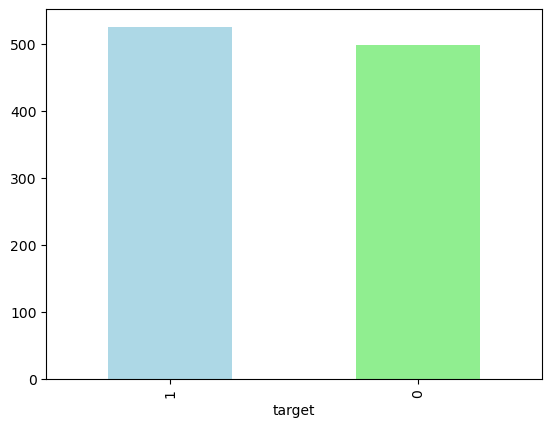

In [77]:
data.target.value_counts().plot(kind='bar', color=['lightblue', 'lightgreen'])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [79]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
data.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

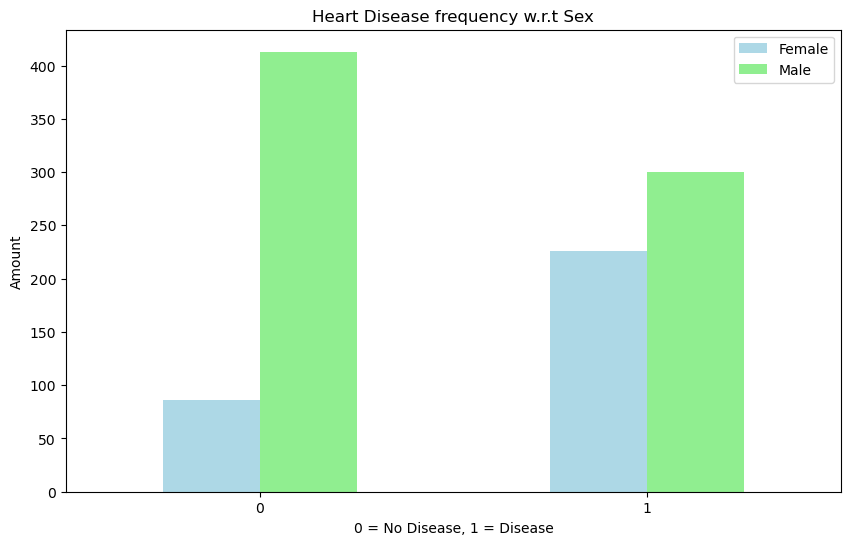

In [81]:
pd.crosstab(data.target, data.sex).plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen'])
plt.title('Heart Disease frequency w.r.t Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

In [82]:
data.thalach.value_counts()

thalach
162    35
160    31
163    29
152    28
173    28
       ..
99      3
187     3
121     3
90      3
113     3
Name: count, Length: 91, dtype: int64

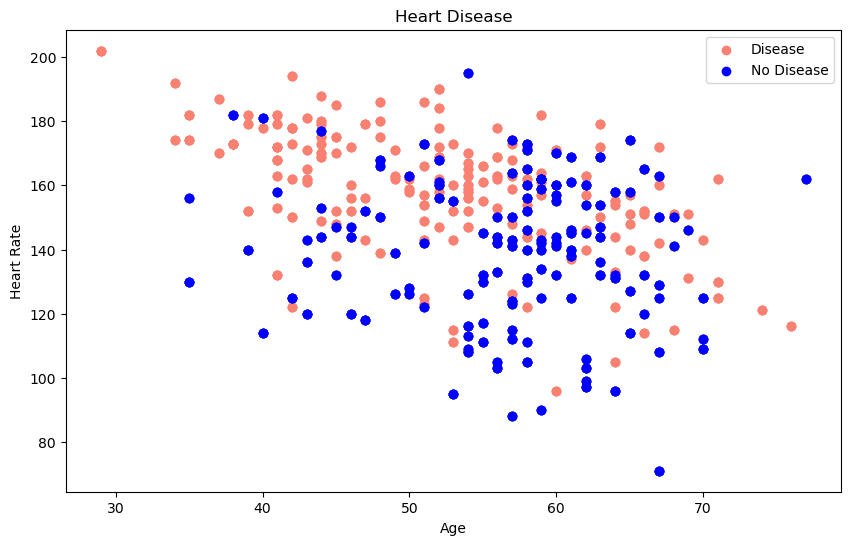

In [83]:
#Creating another Figure

plt.figure(figsize=(10, 6))
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c='salmon')
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c='blue')

plt.title('Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show()

<Axes: ylabel='Frequency'>

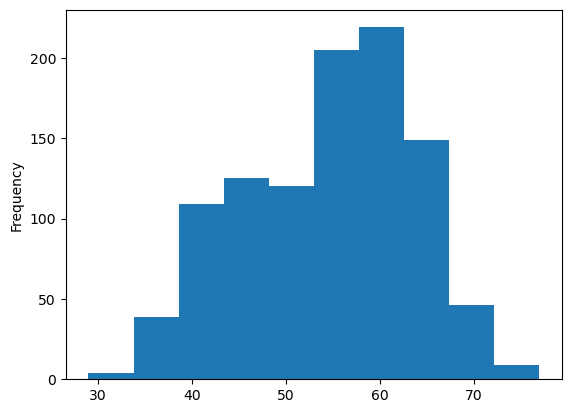

In [84]:
data.age.plot.hist()

<Axes: ylabel='Frequency'>

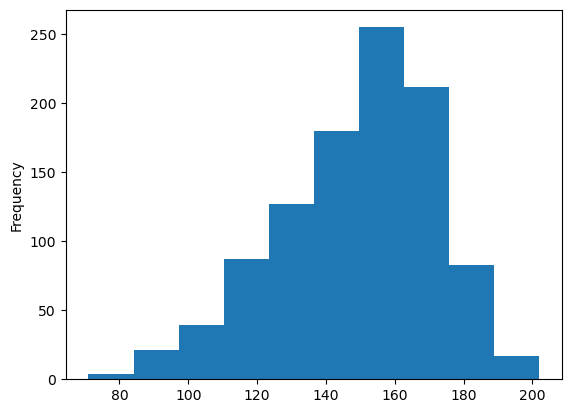

In [85]:
data.thalach.plot.hist()

<Axes: ylabel='Frequency'>

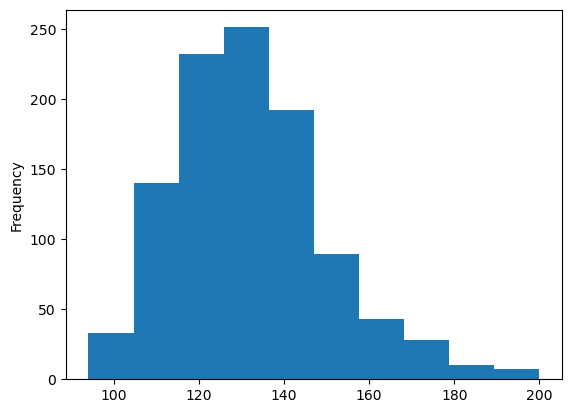

In [86]:
data.trestbps.plot.hist()

<Axes: xlabel='cp'>

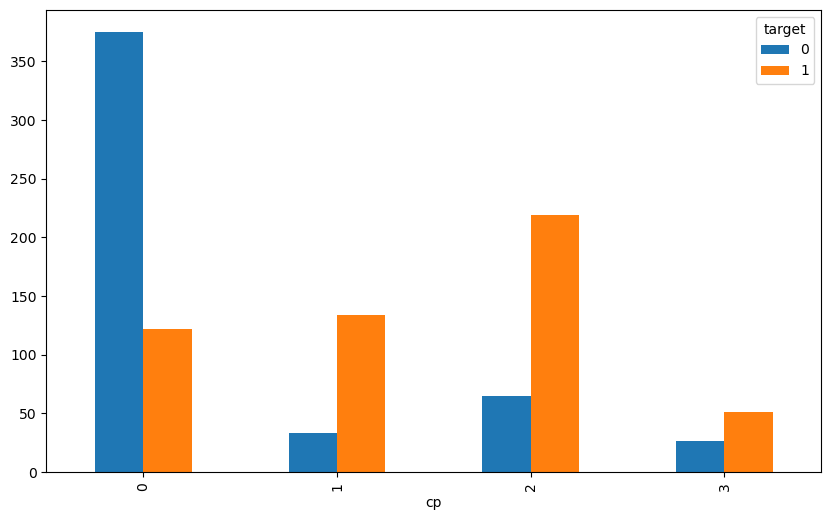

In [87]:
pd.crosstab(data.cp, data.target).plot(kind='bar', figsize=(10, 6))

In [88]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


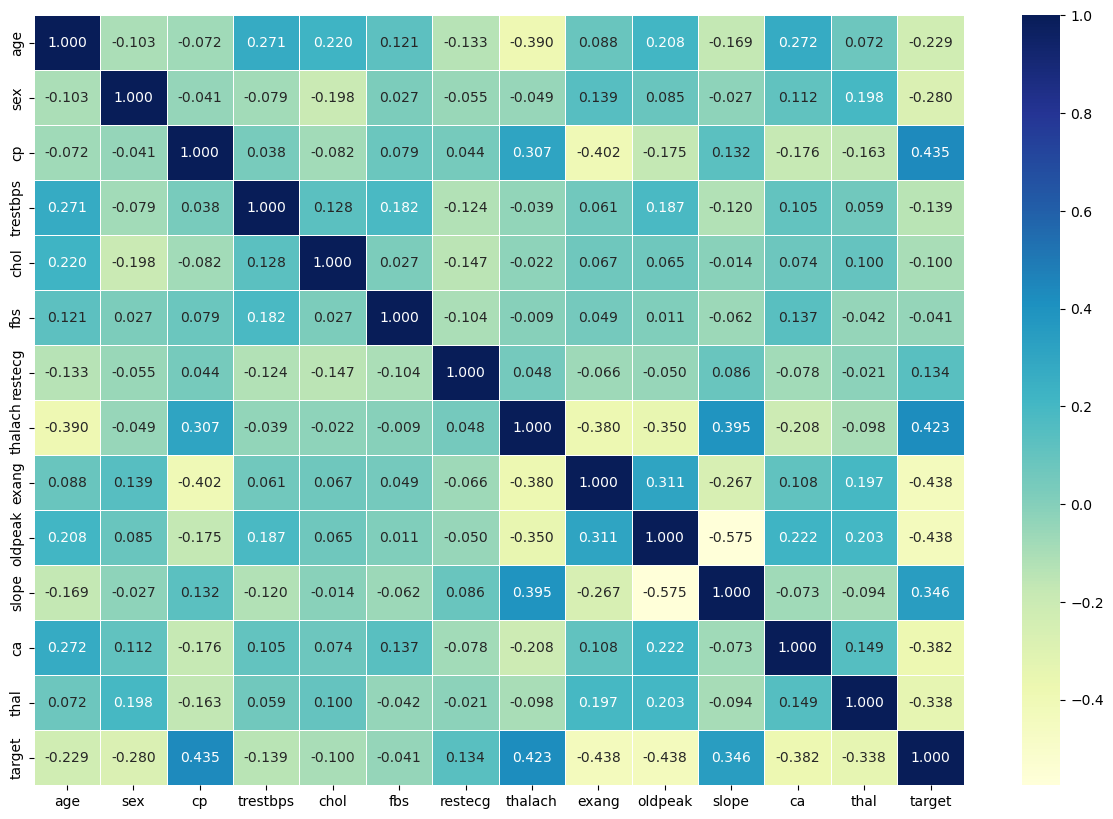

In [89]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.3f', cmap='YlGnBu')

In [90]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [91]:
np.random.seed(42)
X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [92]:
 models = {
     'Logistic Regression': LogisticRegression(max_iter=1000),
     'KNN': KNeighborsClassifier(),
     'Random Forest': RandomForestClassifier()
 }

In [93]:
def fit_and_score (models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [94]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.7951219512195122,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

In [95]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.795122,0.731707,0.985366


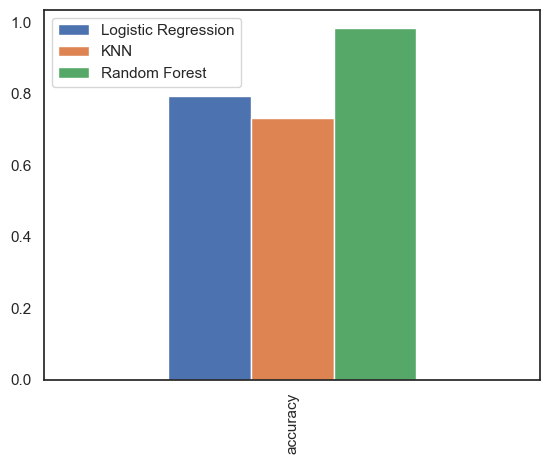

In [273]:
model_compare.plot.bar()
plt.savefig("different.png", dpi=300, bbox_inches='tight')

In [266]:
model = RandomForestClassifier(max_depth=6)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [267]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9024390243902439

In [268]:
precision = precision_score(y_test, y_preds)
precision

0.8738738738738738

In [269]:
recall = recall_score(y_test, y_preds)
recall

0.941747572815534

In [270]:
f1 = f1_score(y_test, y_preds)
f1

0.9065420560747663

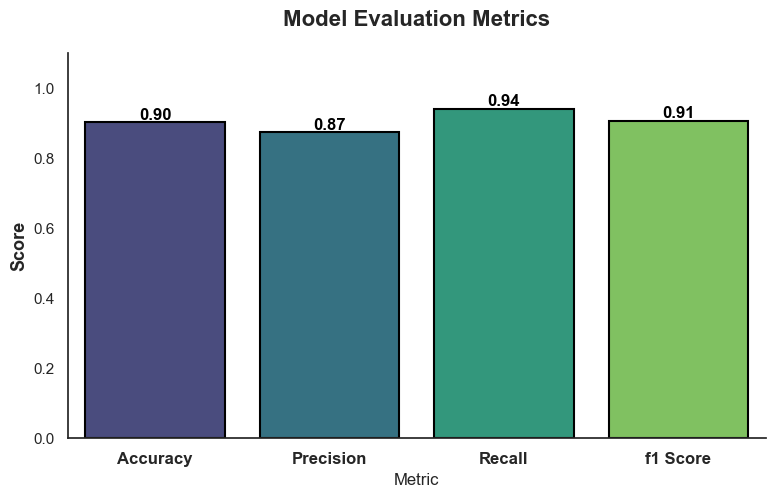

In [272]:
model_evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'f1 Score': f1,
}

# Convert to DataFrame
df = pd.DataFrame(list(model_evaluation_metrics.items()), columns=['Metric', 'Value'])

# Set Seaborn theme
sns.set_theme(style="white")

# Create figure and axis
plt.figure(figsize=(9, 5))
ax = sns.barplot(x="Metric", y="Value", hue="Metric", data=df, palette="viridis", legend=False, 
                 edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize the plot
plt.title("Model Evaluation Metrics", fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1.1)  # Extend limit slightly for visibility
plt.xticks(fontsize=12, fontweight='bold', rotation=0)
plt.yticks(fontsize=11)
plt.ylabel("Score", fontsize=13, fontweight='bold')

# Remove top and right borders
sns.despine()
plt.savefig("evaluation.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()

In [229]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0])

In [230]:
np.array(y_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

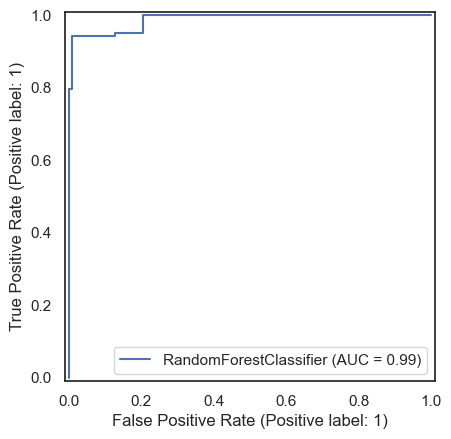

In [231]:
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [232]:
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f"Mean AUC: {auc_scores.mean():.3f}")

Mean AUC: 0.991


In [233]:
import pandas as pd

df = pd.DataFrame(X)  # Convert to DataFrame if not already
df['target'] = y

correlation = df.corr()['target'].sort_values(ascending=False)
print(correlation)


target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [234]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print(f"Mean AUC: {auc_scores.mean():.3f}")

Mean AUC: 0.993


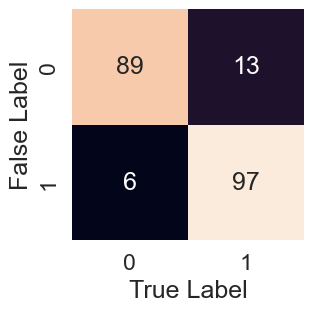

In [257]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3 ,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('False Label')
    bottom, top = ax.get_ylim()
    plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

plot_confusion_matrix(y_test, y_preds)


In [236]:
y_proba = model.predict_proba(X_test)

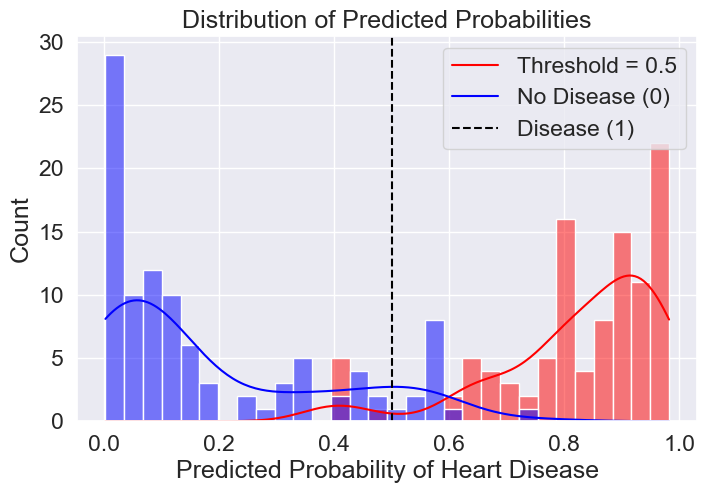

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert probabilities to a DataFrame
df_proba = pd.DataFrame({'Probability': y_proba[:, 1], 'True Label': y_test})

# Plot
plt.figure(figsize=(8,5))
sns.histplot(df_proba, x='Probability', hue='True Label', bins=30, kde=True, palette=['blue', 'red'])
plt.axvline(0.5, color='black', linestyle='dashed', label='Threshold = 0.5')
plt.xlabel("Predicted Probability of Heart Disease")
plt.ylabel("Count")
plt.title("Distribution of Predicted Probabilities")
plt.legend(["Threshold = 0.5", "No Disease (0)", "Disease (1)"])
plt.savefig("prob.png", dpi=300, bbox_inches='tight')
plt.show()


In [242]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       102
           1       0.88      0.94      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [247]:
recall = cross_val_score(model, X, y, cv=5, scoring='recall')

In [248]:
recall

array([0.99047619, 0.98095238, 1.        , 0.98095238, 0.96226415])

In [249]:
precision = cross_val_score(model, X, y, cv=5, scoring='precision')
precision

array([0.96330275, 0.95327103, 0.9375    , 0.93636364, 0.9266055 ])

In [250]:
accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
accuracy

array([0.97560976, 0.95121951, 0.97073171, 0.95121951, 0.93658537])

In [252]:
print(recall.mean())

0.9829290206648696


In [253]:
print(accuracy.mean())

0.9570731707317073


In [254]:
print(precision.mean())

0.9434085842563509


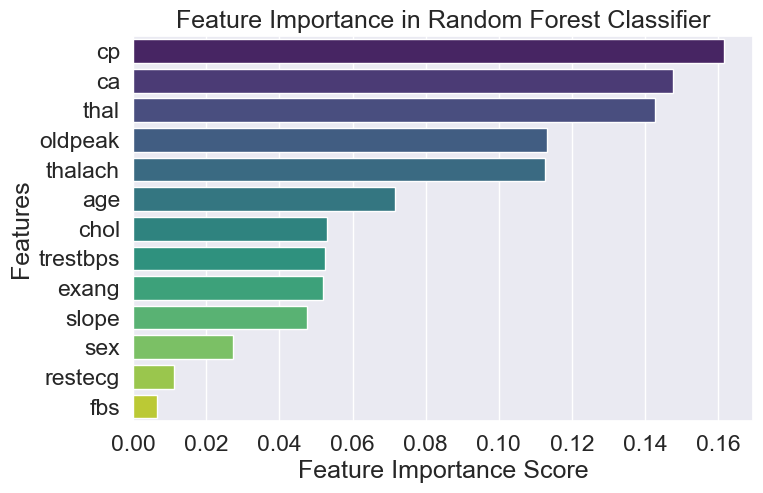

In [258]:
# Get feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                   'Importance': model.feature_importances_})

# Sort in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot without the warning
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='viridis', legend=False)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Classifier")
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


In [275]:
from joblib import dump

dump(model, filename='heart-disease-classifier.joblib')

['heart-disease-classifier.joblib']